#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Practica 7: Regularización de modelos de regresión (aplicados a data de diabetes) Alumno: Ibarra Ramírez Sergio </font>

Vamos a importar la data y separar en train y test 

In [3]:
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes(as_frame=True)
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

La variable dependiente (y) se encuentra en diabetes['target'] 

In [4]:
y_diabetes = diabetes['target']
y_diabetes

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

Las variables independiente (X) se encuentra en diabetes['data'] 

In [5]:
X_diabetes = diabetes['data']
X_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Hacemos la división de datos de entrenamieto y datos de prueba 

In [6]:
from sklearn.model_selection import train_test_split

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes,y_diabetes,test_size=0.2,random_state=2023)
X_diabetes_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
318,0.088931,-0.044642,0.006728,0.025315,0.030078,0.008707,0.063367,-0.039493,0.009434,0.032059
301,-0.001882,0.050680,-0.024529,0.052858,0.027326,0.030001,0.030232,-0.002592,-0.021395,0.036201
189,-0.001882,-0.044642,-0.066563,0.001215,-0.002945,0.003070,0.011824,-0.002592,-0.020292,-0.025930
288,0.070769,0.050680,-0.016984,0.021872,0.043837,0.056305,0.037595,-0.002592,-0.070209,-0.017646
...,...,...,...,...,...,...,...,...,...,...
220,0.023546,0.050680,-0.039618,-0.005670,-0.048351,-0.033255,0.011824,-0.039493,-0.101640,-0.067351
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
183,0.045341,0.050680,-0.035307,0.063187,-0.004321,-0.001627,-0.010266,-0.002592,0.015568,0.056912
25,-0.067268,0.050680,-0.012673,-0.040099,-0.015328,0.004636,-0.058127,0.034309,0.019196,-0.034215


#### Vamos a importar el modelo linear_model y definir el modelo Lasso (primero probando un valor de alpha = 0.1)

In [7]:
from sklearn import linear_model
lasso_alpha01 = linear_model.Lasso(alpha=0.1)
lasso_alpha01

Lasso(alpha=0.1)

Entenamos el modelo Lasso (primero probando un valor de alpha = 0.1)

In [8]:
lasso_alpha01.fit(X_diabetes_train,y_diabetes_train)

Lasso(alpha=0.1)

Revisamos como fueron los coeficientes del modelo Lasso 

In [16]:
caracteristicas = diabetes['feature_names']
coef_dict_lasso_alpha01 = {}

for coef,caracteristica in zip(lasso_alpha01.coef_,caracteristicas):
  coef_dict_lasso_alpha01[caracteristica] = coef

print(coef_dict_lasso_alpha01)

{'age': -0.0, 'sex': -161.09393153480914, 'bmi': 531.4720897980042, 'bp': 241.13828551889162, 's1': -84.38639298857666, 's2': -0.0, 's3': -178.70588682601965, 's4': 0.0, 's5': 503.2386657315167, 's6': 33.187302063467676}


Notar como Lasso 'apaga' los pesos de las variables menos importantes'. En este caso de: age, s2 y s4 

In [10]:
lasso_alpha01.coef_

array([  -0.        , -161.09393153,  531.4720898 ,  241.13828552,
        -84.38639299,   -0.        , -178.70588683,    0.        ,
        503.23866573,   33.18730206])

Revismos el error con el modelo Lasso (primero probando un valor de alpha = 0.1)

In [11]:
from sklearn.metrics import mean_squared_error

y_pred_lasso_alpha01 =  lasso_alpha01.predict(X_diabetes_test)
RMSE_lasso_alpha01 = mean_squared_error(y_diabetes_test,y_pred_lasso_alpha01,squared=False)
print(RMSE_lasso_alpha01)

59.306963640020875


In [12]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already obtained the predictions in y_pred and the true values in y_test
mape_lasso_alpha01 = mean_absolute_percentage_error(y_diabetes_test,y_pred_lasso_alpha01)
print("MAPE:", mape_lasso_alpha01)

MAPE: 0.5025348626436182


Se observa que con un alpha de 0.1 el MAPE obtenido es del ~50% 

Vamos a hacer un loop para diferentes valores de alpha 

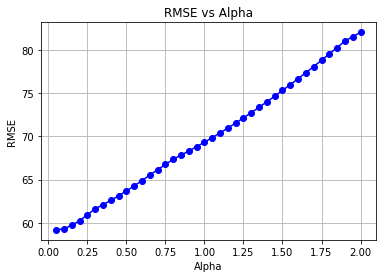

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
alphas_lasso = np.arange(0.05, 2.05, 0.05)

# Initialize lists to store alpha values and corresponding RMSEs
alpha_lasso_values = []
rmse_values_lasso = []

# Iterate through each alpha value
for alpha in alphas_lasso:
    # Create and fit the Lasso model
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test set
    y_pred_lasso_diabetes = lasso.predict(X_diabetes_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_diabetes_test, y_pred_lasso_diabetes, squared=False)
    
    # Store the alpha value and corresponding RMSE
    alpha_lasso_values.append(alpha)
    rmse_values_lasso.append(rmse)
    
    # Print the RMSE for each alpha value (optional)
    #print(f"Alpha: {alpha:.2f}, RMSE: {rmse:.2f}")

# Plotting RMSE vs alpha
plt.plot(alpha_lasso_values, rmse_values_lasso, 'bo-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.grid(True)
plt.show()

Se observa como a mayores valores de alpha se presenta simpre un mayor error

Observemos como se muestran los valores predichos/calculados vs valores reales de testeo

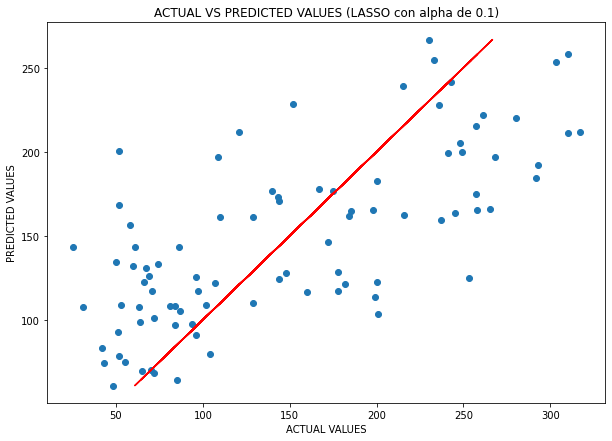

In [28]:
#figure size
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_diabetes_test, y_pred_lasso_alpha01)
#plt.plot(y_diabetes_test, y_diabetes_test, color='r')

plt.plot(y_pred_lasso_alpha01, y_pred_lasso_alpha01, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (LASSO con alpha de 0.1)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
#showig plot
plt.show()

#### Ahora vamos a importar el modelo Ridge (primero probando un valor de alpha = 0.1)

In [14]:
from sklearn import linear_model
ridge_alpha01 = linear_model.Ridge(alpha=0.1)
ridge_alpha01

Ridge(alpha=0.1)

Entrenamos el modleo Ridge (primero probando un valor de alpha = 0.1)

In [15]:
ridge_alpha01.fit(X_diabetes_train,y_diabetes_train)

Ridge(alpha=0.1)

Revisamos como fueron los coeficientes del modelo Ridge 

In [20]:
caracteristicas = diabetes['feature_names']
coef_dict_ridge_alpha01 = {}

for coef,caracteristica in zip(ridge_alpha01.coef_,caracteristicas):
  coef_dict_ridge_alpha01[caracteristica] = coef

print(coef_dict_ridge_alpha01)


{'age': -31.764902792471716, 'sex': -205.45435341837958, 'bmi': 494.07431426860836, 'bp': 274.9816666885581, 's1': -71.05429866210567, 's2': -81.25411582767184, 's3': -188.91687936239197, 's4': 80.56825139663533, 's5': 447.1325963737084, 's6': 97.97181058709164}


Notar como Ridge 'reduce' los pesos de las variables menos importantes'. En este caso de: age, s1, s2, s4 y s6 

Evaluamos el error con el modelo Ridge  (primero probando un valor de alpha = 0.1)

In [31]:
from sklearn.metrics import mean_squared_error

y_pred_ridge_alpha01 =  ridge_alpha01.predict(X_diabetes_test)
RMSE_ridge_alpha01 = mean_squared_error(y_diabetes_test,y_pred_ridge_alpha01,squared=False)
print(RMSE_ridge_alpha01)

59.19327679741282


Vamos a hacer un loop para diferentes valores de alhpa en para Ridge 

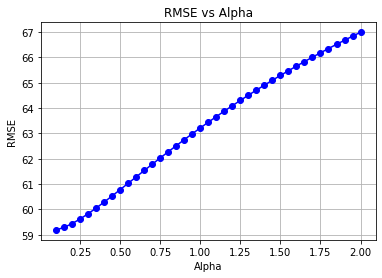

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
alphas_ridge = np.arange(0.1, 2.05, 0.05)

# Initialize lists to store alpha values and corresponding RMSEs
alpha_ridge_values = []
rmse_values_ridge = []

# Iterate through each alpha value
for alpha in alphas_ridge:
    # Create and fit the Lasso model
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test set
    y_diabetes_pred_ridge = ridge.predict(X_diabetes_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_diabetes_test, y_diabetes_pred_ridge, squared=False)
    
    # Store the alpha value and corresponding RMSE
    alpha_ridge_values.append(alpha)
    rmse_values_ridge.append(rmse)
    
    # Print the RMSE for each alpha value (optional)
    #print(f"Alpha: {alpha:.2f}, RMSE: {rmse:.2f}")

# Plotting RMSE vs alpha
plt.plot(alpha_ridge_values, rmse_values_ridge, 'bo-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.grid(True)
plt.show()

Se observa como a mayores valores de alpha se presenta simpre un mayor error

Observemos como se muestran los valores predichos/calculados vs valores reales de testeo

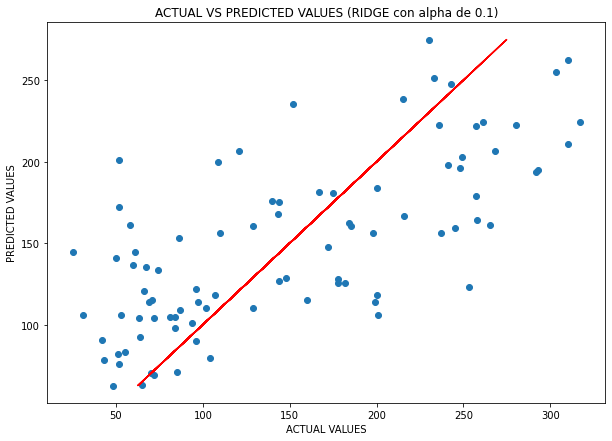

In [32]:
#figure size
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_diabetes_test, y_pred_ridge_alpha01)
#plt.plot(y_diabetes_test, y_diabetes_test, color='r')

plt.plot(y_pred_ridge_alpha01, y_pred_ridge_alpha01, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (RIDGE con alpha de 0.1)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
#showig plot
plt.show()

#### Vamos a importar el modelo linear_model y definir el modelo Net-Elastic (con un alpha de 0.1 y con r=0.5)

Definiendo y entrenando el modelo Net-elastic 

In [33]:
modelo_elastic_1 = linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)

modelo_elastic_1.fit(X_diabetes_train,y_diabetes_train)

ElasticNet(alpha=0.1)

Para averiguar los coeficientes delo modelo Net-elastic 

In [22]:
cacteristicas = X.columns
coef_dict = {}

for coef,caracteristica in zip(modelo_elastic.coef_,caracteristicas):
  coef_dict[caracteristica] = coef

print(coef_dict)

{'A': -0.004786013814330012, 'B': -0.0, 'C': 0.0, 'D': 0.20019088680188962, 'F': 0.0}


Vamos a hace run loop para diferentes valores de alpha en NET-ELASTIC

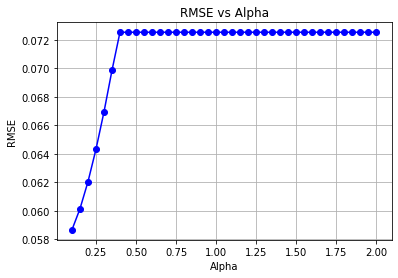

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
alphas_net = np.arange(0.1, 2.05, 0.05)

# Initialize lists to store alpha values and corresponding RMSEs
alpha_net_values = []
rmse_values_net = []

# Iterate through each alpha value
for alpha in alphas_net:
    # Create and fit the Lasso model
    net = linear_model.ElasticNet(alpha=alpha,l1_ratio=0.5)
    net.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_net = net.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred_net, squared=False)
    
    # Store the alpha value and corresponding RMSE
    alpha_net_values.append(alpha)
    rmse_values_net.append(rmse)
    
    # Print the RMSE for each alpha value (optional)
    #print(f"Alpha: {alpha:.2f}, RMSE: {rmse:.2f}")

# Plotting RMSE vs alpha
plt.plot(alpha_net_values, rmse_values_net, 'bo-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.grid(True)
plt.show()

Vamos a hace run loop para diferentes valores de li_ratio  en NET-ELASTIC

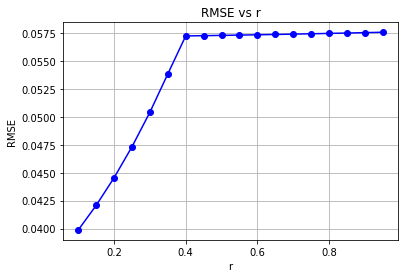

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
li_ratios = np.arange(0.1, 1, 0.05)

# Initialize lists to store alpha values and corresponding RMSEs
l1_ratio_net_values = []
rmse_values_net_ratio = []

# Iterate through each alpha value
for li in li_ratios:
    # Create and fit the Lasso model
    net_l1_ratio = linear_model.ElasticNet(alpha=0.025,l1_ratio=li)
    net_l1_ratio.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_net_l1_ratio = net_l1_ratio.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred_net_l1_ratio, squared=False)
    
    # Store the alpha value and corresponding RMSE
    l1_ratio_net_values.append(li)
    rmse_values_net_ratio.append(rmse)
    
    # Print the RMSE for each alpha value (optional)
    #print(f"Alpha: {alpha:.2f}, RMSE: {rmse:.2f}")

# Plotting RMSE vs alpha
plt.plot(l1_ratio_net_values, rmse_values_net_ratio, 'bo-')
plt.xlabel('r')
plt.ylabel('RMSE')
plt.title('RMSE vs r')
plt.grid(True)
plt.show()